In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1. Definir parâmetros
# =========================
context_length = 398  # históricos para o modelo
horizon = 64          # passos a prever
N = context_length + horizon  # total da série

model_path = "moe_model.pt"
device = "cpu"

# =========================
# 2. Criar série sintética 
# =========================
t = np.arange(N)
series = np.sin(2 * np.pi * t / 50) + 0.1 * np.random.randn(N)

In [2]:
series.shape

(462,)

In [3]:
series

array([ 0.08239638,  0.24816742,  0.33348559,  0.41232449,  0.46534299,
        0.51804221,  0.73291844,  0.74271395,  0.82313806,  0.74892642,
        1.01281568,  0.90438538,  1.01565767,  1.05454437,  0.77303913,
        0.7050974 ,  0.79317947,  0.77603532,  0.77807384,  0.49271384,
        0.47974607,  0.5650406 ,  0.4399666 ,  0.36619085,  0.02683626,
        0.020905  ,  0.04625304, -0.11921594, -0.45470311, -0.29836893,
       -0.53540496, -0.74684403, -0.93458898, -0.85872794, -0.94697358,
       -0.90539692, -0.99165424, -1.03996593, -1.1337466 , -0.92482543,
       -0.95179802, -0.92316848, -0.86494661, -0.78654785, -0.74323702,
       -0.65810595, -0.49035519, -0.43429415, -0.22849682, -0.15387846,
        0.03084128,  0.19411439,  0.32776012,  0.52733348,  0.5010827 ,
        0.57514878,  0.62232377,  0.82821712,  0.86191917,  0.98191175,
        1.07845159,  0.91630014,  1.02024181,  1.09934821,  0.87591432,
        0.88886527,  0.98505796,  0.83558514,  0.8786644 ,  0.70

In [4]:
# =========================
# 2. Predizer
# =========================
from setup.models.modeling_model import predict_from_model

preds = predict_from_model(model_path=model_path, series=series[:-horizon], horizon=horizon, context_length=context_length, device=device)
print(preds)

c:\Users\alex-\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)].


W0922 20:29:03.395000 10888 site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.
c:\Users\alex-\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Sample 0: Selected -> Time-MoE: 0.570, Chronos: 0.430; Not selected -> Moirai: 0.095, TimesFM: 0.219, Timer: 0.150
tensor([[-0.2131, -0.0908,  0.0329,  0.1515,  0.2823,  0.3983,  0.4757,  0.5557,
          0.6438,  0.7102,  0.7680,  0.8087,  0.8521,  0.8670,  0.8810,  0.8754,
          0.8685,  0.8334,  0.7979,  0.7404,  0.6782,  0.6000,  0.4969,  0.3994,
          0.3034,  0.2102,  0.1011, -0.0099, -0.1118, -0.2045, -0.3083, -0.4102,
         -0.5008, -0.5859, -0.6906, -0.7703, -0.8223, -0.8588, -0.8803, -0.8881,
         -0.8713, -0.8681, -0.8440, -0.8041, -0.7269, -0.6322, -0.5482, -0.4669,
         -0.3717, -0.2678, -0.1560, -0.0529,  0.0651,  0.1689,  0.2706,  0.3416,
          0.4244,  0.4968,  0.5545,  0.6028,  0.6436,  0.6819,  0.7074,  0.7097]])


In [5]:
preds.shape

torch.Size([1, 64])

In [6]:
# =========================
# 3. Converter saída em array
# =========================
pred_list = preds.squeeze(0).tolist()
pred_array = np.array(pred_list)

In [7]:
pred_array

array([-0.21305004, -0.09079059,  0.03286013,  0.15153301,  0.28227353,
        0.39833483,  0.47565046,  0.55570793,  0.64383626,  0.71016812,
        0.76799285,  0.80868208,  0.85211945,  0.8669728 ,  0.88100874,
        0.87536681,  0.8685419 ,  0.83338165,  0.79790533,  0.74043381,
        0.67822695,  0.59999657,  0.49694479,  0.39936292,  0.30341199,
        0.21019687,  0.10114122, -0.00987812, -0.11184295, -0.20448002,
       -0.30834508, -0.41016555, -0.50079012, -0.58591318, -0.6906175 ,
       -0.77032864, -0.82232499, -0.8587575 , -0.88027215, -0.88811356,
       -0.87127447, -0.86811185, -0.84403491, -0.80407059, -0.72691262,
       -0.63215047, -0.54824382, -0.46693033, -0.37171268, -0.26778454,
       -0.15604307, -0.05289885,  0.06506364,  0.16885817,  0.27061164,
        0.34156358,  0.42441958,  0.4967635 ,  0.55450022,  0.60277659,
        0.6435529 ,  0.68193722,  0.70740068,  0.70973146])

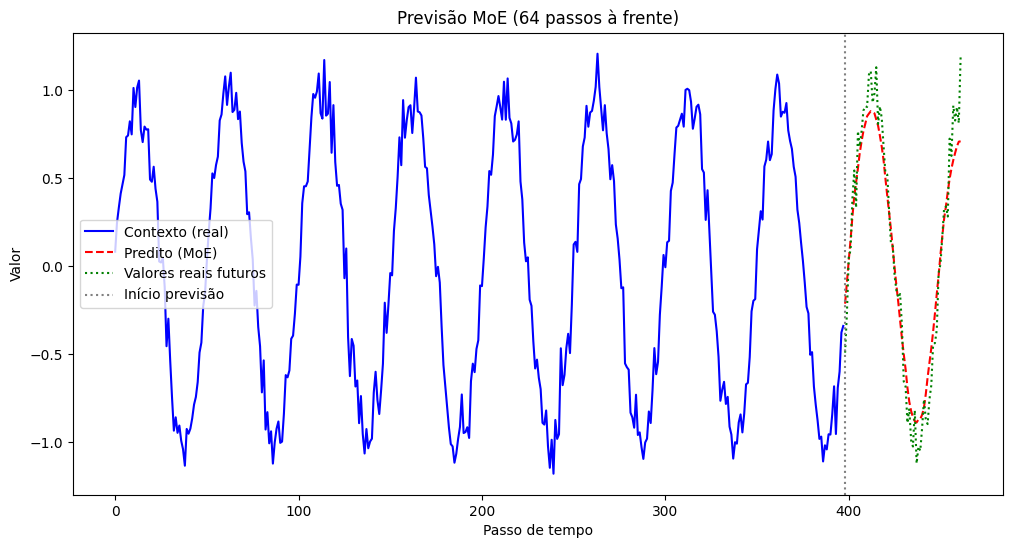

In [8]:
# =========================
# 4. Plotar
# =========================
context = series[:context_length]
future_real = series[context_length:] 

time_axis_context = range(context_length)
time_axis_pred = range(context_length, context_length + horizon)
time_axis_real = range(context_length, context_length + horizon)

plt.figure(figsize=(12,6))
plt.plot(time_axis_context, context, label="Contexto (real)", color="blue")
plt.plot(time_axis_pred, pred_array, label="Predito (MoE)", color="red", linestyle="--")
plt.plot(time_axis_real, future_real, label="Valores reais futuros", color="green", linestyle=":")

plt.axvline(context_length, color="gray", linestyle=":", label="Início previsão")
plt.legend()
plt.xlabel("Passo de tempo")
plt.ylabel("Valor")
plt.title(f"Previsão MoE ({horizon} passos à frente)")
plt.show()